In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fp1 = pd.read_csv('full_probs.log',delimiter='\t',names=['label','mu','s'])
fps = pd.read_csv('full_probs_single.log',delimiter='\t',names=['label','mu','s'])
lb1 = pd.read_csv('lower_bounds.log',delimiter='\t',names=['label','mu','s'])
lbs = pd.read_csv('lower_bounds_single.log',delimiter='\t',names=['label','mu','s'])
dfs = [fp1,lb1]

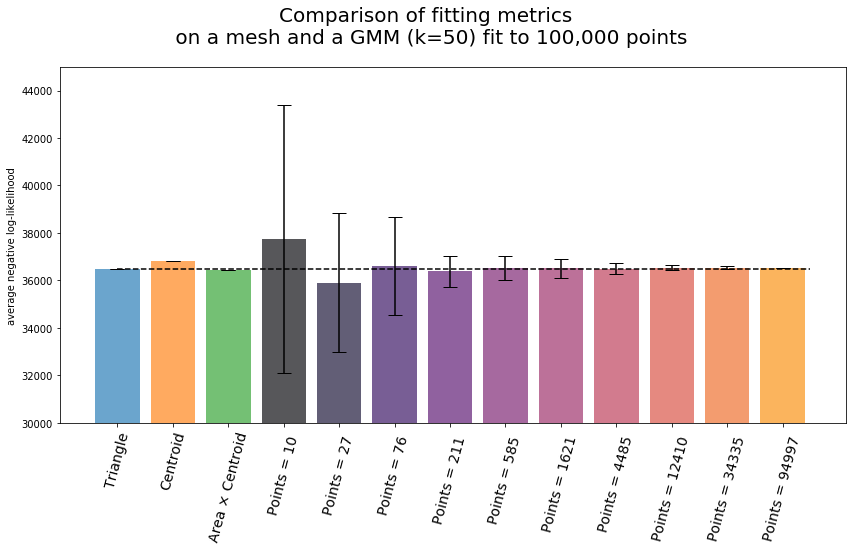

In [27]:
fig = plt.figure(figsize=(12,8))
def pname(s):
    try: 
        int(s)
        return "Points = " + s
    except ValueError:
        if s == 'tri':
            return 'Triangle'
        elif s == 'mpt':
            return 'Centroid'
        elif s == 'com':
            return 'Area × Centroid'
        else:
            return s

for idx,df in enumerate(dfs[-1:]):
    ind = np.arange(1,df.shape[0]+1)
    # inferno summer magma
    ax = plt.gca()#plt.subplot(2,1,idx+1)
    colors =[_['color'] for _ in list(plt.rcParams['axes.prop_cycle'])[:3]]
    colors = colors + [plt.cm.inferno(i/float(df.shape[0]-1)) for i in range(df.shape[0]-3)]
    #print(colors)
    ax.bar(np.arange(1, df.shape[0]+1), -df.mu, yerr=df.s*2, align='center', 
           alpha=0.66, ecolor='black', capsize=7, color=colors)
    #if idx != 0:
    ax.set_xticklabels([pname(_) for _ in df.label],rotation=75,fontdict={'fontsize':14})
    #else:
    #    ax.set_xticklabels([])
    ax.set_xticks(ind)
    if idx == 0:
        ax.set_ylabel('average negative log-likelihood')
    else:
        ax.set_ylabel('average of all mixture & sample log-likelihoods')
    #ax.set_ylim((df.mu-2.5*df.s).min(),(df.mu+2.5*df.s).max())
    plt.hlines(-df.iloc[0,1],1,ind.max()+0.5,linestyles='--')
    #ax.set_ylim([0, 100])
    #ax.set_ylabel('Percent usage')
    #ax.set_title('System Monitor')
    ax.set_ylim([30000,45000])
#plt.tight_layout()
fig.suptitle("Comparison of fitting metrics \n on a mesh and a GMM (k=50) fit to 100,000 points", fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.9])
fig.savefig("likelihood2.pdf")

###### 